### Build A Basic Chatbot With Langgraph(GRAPH API)

In [2]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model 
from typing import Annotated
from typing_extensions import TypedDict 
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [3]:
import os 
from dotenv import load_dotenv 
load_dotenv()

True

In [4]:
llm= ChatGroq(model="llama3-8b-8192")

In [5]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000027DE1B59D30>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000027DE1B5A900>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
llm= init_chat_model("groq:llama3-8b-8192")

In [7]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000027DE2C35950>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000027DE2C36350>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [8]:
# Define State

class State(TypedDict):
    """ 
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    """
    messages: Annotated[list, add_messages]

In [9]:
# Node Functionality
def chatbot(state: State):
    # messages= state["messages"]
    # response= llm.invoke(messages)
    # return {"messages": [response]}

    return {"messages": [llm.invoke(state["messages"])]}

In [10]:
# Initialize the State Graph
graph_builder= StateGraph(State)

# Adding node
graph_builder.add_node("llmchatbot", chatbot)
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

# compile the graph
graph= graph_builder.compile()

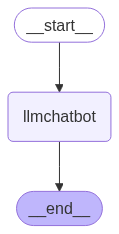

In [11]:
# Visualize the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception as ex:
    pass 

In [12]:
graph.invoke({"messages": ["Hi"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='d205b030-f4a1-436b-93d2-c71ef424fcfa'),
  AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.01819455, 'prompt_time': 0.001702571, 'queue_time': 0.264662789, 'total_time': 0.019897121}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'stop', 'logprobs': None}, id='run--4e2e59bb-134d-4bee-b9be-625d805ddab2-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})]}

In [13]:
response= graph.invoke({"messages": ["What is Agentic AI?"]})
# Print Last Messages
response["messages"][-1]

AIMessage(content='Agentic AI, also known as Agent-based AI, refers to a type of artificial intelligence (AI) that is designed to exhibit intelligent behavior similar to that of a human agent. In other words, Agentic AI systems are capable of autonomous decision-making, planning, and execution, similar to how humans make decisions and take actions in the world.\n\nIn Agentic AI, the AI system is designed to have agency, or the ability to make decisions and take actions based on its own goals, beliefs, and desires. This is in contrast to more traditional AI systems, which are often designed to simply perform a specific task or function, without having the ability to make decisions or take actions on their own.\n\nAgentic AI systems are typically designed to be more flexible and adaptable than traditional AI systems, as they are able to learn from experience and adjust their behavior in response to changing circumstances. They may also be able to communicate with humans and other agents 

In [14]:
# Print First Messages
response["messages"][0]

HumanMessage(content='What is Agentic AI?', additional_kwargs={}, response_metadata={}, id='36bbfa7d-ad06-4e85-a221-10d2180e73fc')

In [15]:
# User's Question
print(response["messages"][0].content)

What is Agentic AI?


In [16]:
# LLM's response
print(response["messages"][-1].content)

Agentic AI, also known as Agent-based AI, refers to a type of artificial intelligence (AI) that is designed to exhibit intelligent behavior similar to that of a human agent. In other words, Agentic AI systems are capable of autonomous decision-making, planning, and execution, similar to how humans make decisions and take actions in the world.

In Agentic AI, the AI system is designed to have agency, or the ability to make decisions and take actions based on its own goals, beliefs, and desires. This is in contrast to more traditional AI systems, which are often designed to simply perform a specific task or function, without having the ability to make decisions or take actions on their own.

Agentic AI systems are typically designed to be more flexible and adaptable than traditional AI systems, as they are able to learn from experience and adjust their behavior in response to changing circumstances. They may also be able to communicate with humans and other agents in a more natural and i

In [17]:
for event in graph.stream({"messages": "Hi How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm just a language model, I don't have emotions or feelings like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have! How can I help you today?


### Chatbot With Tool

In [18]:
from langchain_tavily import TavilySearch

tool= TavilySearch(max_results=2)
tool.invoke("What is Agentic AI?")

{'query': 'What is Agentic AI?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What Is Agentic AI? - IBM',
   'url': 'https://www.ibm.com/think/topics/agentic-ai',
   'content': 'What Is Agentic AI? What is agentic AI? What is agentic AI? While generative models focus on creating content based on learned patterns, agentic AI extends this capability by applying generative outputs toward specific goals. A generative AI model like OpenAI’s ChatGPT might produce text, images or code, but an agentic AI system can use that generated content to complete complex tasks autonomously by calling external tools. What are the advantages of agentic AI? How agentic AI works AI orchestration is the coordination and management of systems and agents. Examples of agentic AI Challenges for agentic AI systems Agentic AI systems have massive potential for the enterprise. Many agentic AI systems use reinforcement learning, which involves maximizing a reward function.',


In [19]:
tool.name

'tavily_search'

In [20]:
tool.args

{'query': {'description': 'Search query to look up',
  'title': 'Query',
  'type': 'string'},
 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'},
   {'type': 'null'}],
  'default': [],
  'description': 'A list of domains to restrict search results to.\n\n        Use this parameter when:\n        1. The user explicitly requests information from specific websites (e.g., "Find climate data from nasa.gov")\n        2. The user mentions an organization or company without specifying the domain (e.g., "Find information about iPhones from Apple")\n\n        In both cases, you should determine the appropriate domains (e.g., ["nasa.gov"] or ["apple.com"]) and set this parameter.\n\n        Results will ONLY come from the specified domains - no other sources will be included.\n        Default is None (no domain restriction).\n        ',
  'title': 'Include Domains'},
 'exclude_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'},
   {'type': 'null'}],
  '

In [21]:
tool.description

'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.'

In [22]:
# Custom function
def multiply(a:int, b:int) -> int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b

In [23]:
tools= [tool, multiply]

In [24]:
llm_with_tools= llm.bind_tools(tools)

In [25]:
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000027DE2C35950>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000027DE2C36350>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list 

In [26]:
import operator
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from typing import List, Annotated, Sequence, TypedDict 
# from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage

In [27]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [28]:
# Node definition
def tool_calling_llm(state: AgentState):
    messages= state["messages"]
    response= llm_with_tools.invoke(messages)
    return {"messages": [response]}

    # return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [29]:
# Grpah
builder= StateGraph(AgentState)

# Add Nodes
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", "tools")

# Add Conditional Edges
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
# Add Edge
builder.add_edge("tools", END)

# Compile the Graph
graph= builder.compile()

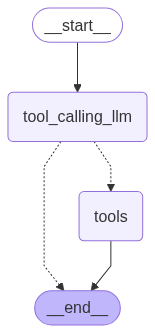

In [30]:
# Visualize the Graph
from IPython.display import display, Image

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [31]:
state= {"messages": ["What is the recent ai news"]}
response= graph.invoke(state)
response

{'messages': ['What is the recent ai news',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'en1jwbb5f', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 2194, 'total_tokens': 2287, 'completion_time': 0.063643736, 'prompt_time': 0.240966294, 'queue_time': 0.27259036400000003, 'total_time': 0.30461003}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c4a0bacb-c0e0-46dd-af4b-147c0536139e-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'time_range': 'day', 'topic': 'news'}, 'id': 'en1jwbb5f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2194, 'output_tokens': 93, 'total_tokens': 2287}),
  ToolMessage(content='{"query": "recent ai news"

In [32]:
# Question
response["messages"][-0]

'What is the recent ai news'

In [33]:
# Response from tools
response["messages"][-1]

ToolMessage(content='{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.lightreading.com/ai-machine-learning/bt-and-vodafone-tech-bosses-troubled-by-dark-side-of-ai", "title": "BT and Vodafone tech bosses troubled by dark side of AI - Light Reading", "score": 0.6501347, "published_date": "Fri, 20 Jun 2025 11:21:04 GMT", "content": "AI & Machine Learning T-Mobile taps OpenAI to reduce customer churn 19/09/2024\\n\\n### Recommended for you\\n\\nAI & Machine Learning Image 22 sponsored Enterprise Networks Evolve From Basic Connectivity to Dynamic Experiences 29/04/2025\\n\\nAI & Machine Learning Orange is working on an AI network \'brain\' to run 5G 18/03/2025\\n\\nAI & Machine Learning MWC visitor numbers are up again, but the industry is decaying 07/03/2025 [...] See more from Iain Morris\\n\\nSubscribe and receive the latest news from the industry.\\n\\nJoin 62,000+ members. Yes it\'s completely free.\\n\\nSign me up\

In [34]:
response["messages"][-1].content

'{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.lightreading.com/ai-machine-learning/bt-and-vodafone-tech-bosses-troubled-by-dark-side-of-ai", "title": "BT and Vodafone tech bosses troubled by dark side of AI - Light Reading", "score": 0.6501347, "published_date": "Fri, 20 Jun 2025 11:21:04 GMT", "content": "AI & Machine Learning T-Mobile taps OpenAI to reduce customer churn 19/09/2024\\n\\n### Recommended for you\\n\\nAI & Machine Learning Image 22 sponsored Enterprise Networks Evolve From Basic Connectivity to Dynamic Experiences 29/04/2025\\n\\nAI & Machine Learning Orange is working on an AI network \'brain\' to run 5G 18/03/2025\\n\\nAI & Machine Learning MWC visitor numbers are up again, but the industry is decaying 07/03/2025 [...] See more from Iain Morris\\n\\nSubscribe and receive the latest news from the industry.\\n\\nJoin 62,000+ members. Yes it\'s completely free.\\n\\nSign me up\\n\\nYou May Also Li

In [35]:
for message in graph.stream(state):
    for key,value in message.items():
        print(f"Output from {key} Node")
        print("_________________________________")
        print(value)
        print("\n")


Output from tool_calling_llm Node
_________________________________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'dcp295h32', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 2194, 'total_tokens': 2279, 'completion_time': 0.058448483, 'prompt_time': 0.241931182, 'queue_time': 0.272625676, 'total_time': 0.300379665}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ba5b3b1f-ac12-4c3e-a133-959c41fb4490-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'topic': 'news'}, 'id': 'dcp295h32', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2194, 'output_tokens': 85, 'total_tokens': 2279})]}


Output from tools Node
_________________________________


In [45]:
response= graph.invoke({"messages": ["What is 5 multiplied by 2"]})
response

{'messages': ['What is 5 multiplied by 2',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'bjvvaf95d', 'function': {'arguments': '{"a":5,"b":2}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 2196, 'total_tokens': 2268, 'completion_time': 0.050468597, 'prompt_time': 0.324468264, 'queue_time': 0.427326633, 'total_time': 0.374936861}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a5b50d92-9fc7-4fcb-91b2-90f98541fef2-0', tool_calls=[{'name': 'multiply', 'args': {'a': 5, 'b': 2}, 'id': 'bjvvaf95d', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2196, 'output_tokens': 72, 'total_tokens': 2268}),
  ToolMessage(content='10', name='multiply', tool_call_id='bjvvaf95d')]}

In [47]:
for message in graph.stream(state):
    for key,value in message.items():
        print(f"Output from {key} Node")
        print("_________________________________")
        print(value)
        print("\n")

Output from tool_calling_llm Node
_________________________________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tf4armxr3', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 132, 'prompt_tokens': 2194, 'total_tokens': 2326, 'completion_time': 0.090291041, 'prompt_time': 0.239626358, 'queue_time': 0.27047328000000004, 'total_time': 0.329917399}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--45f569ba-af43-4a4b-9a00-b97b3033b450-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'topic': 'news'}, 'id': 'tf4armxr3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2194, 'output_tokens': 132, 'total_tokens': 2326})]}


Output from tools Node
________________________

In [50]:
response= graph.invoke({"messages": ["Give me the recent ai news and then multiply 5 by 10"]})
response

{'messages': ['Give me the recent ai news and then multiply 5 by 10',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '378hftytp', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}, {'id': 'p7c9s1q0t', 'function': {'arguments': '{"a":5,"b":10}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 174, 'prompt_tokens': 2202, 'total_tokens': 2376, 'completion_time': 0.122252163, 'prompt_time': 0.245579891, 'queue_time': 0.27544376699999995, 'total_time': 0.367832054}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ae95d61c-5443-49f9-b218-12398e006534-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'time_range': 'day', 'topic': 'news'}, 'id': '378hftytp', 'type': 'tool_call'},

In [51]:
for message in graph.stream(state):
    for key,value in message.items():
        print(f"Output from {key} Node")
        print("_________________________________")
        print(value)
        print("\n")

Output from tool_calling_llm Node
_________________________________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '8s2s1g7q9', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 2194, 'total_tokens': 2287, 'completion_time': 0.065160725, 'prompt_time': 0.268924433, 'queue_time': 0.45005844399999995, 'total_time': 0.334085158}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0c554984-24be-4e0f-ab9a-8aa2b052c63e-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'time_range': 'day', 'topic': 'news'}, 'id': '8s2s1g7q9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2194, 'output_tokens': 93, 'total_tokens': 2287})]}


Output fr

### ReAct Agent Architecture